# Fundamentos de Data Science - Rendimiento Escolar

## Preliminares

A continuación se busca desarrollar un modelo de regresión lineal, cuyo objetivo será clasificar a los estudiantes, para identificar a aquellos que tienen un bajo rendimiento.

Se utilizarán como datos de entrada los atributos sociodemográficos y conductuales de los alumnos, el procesamiento de los datos se realizará en Jupyter Notebooks con lenguaje de programación. 

En cuanto al tratamiento de los datos, las variables categóricas serán convertidas convertidas mediante la aplicación de binary encoding, para obtener más información y comparar con otros datos. Posteriormente se obtendrán los z-scores, para introducir los datos al modelo, lo cual permitirá comparar los datos con una magnitud similar.

Las métricas principales para la selección de regresores, serán las correlaciones. Durante la implementación del modelo econométricos, los modelos se podran comparar mediante R-squared, adjusted R-squared y los regresores mediante el p-value.
Para el caso del modelo predictivo, los principales resultados serán en MSE y R-squared.

En general las fases y sus principales procesos, para obtener la información y los resultados serán los siguientes:

__1. Descripción:__

- Análisis exploratorio de los datos.

- Data wrangling.

- Gráficos de variables categóricas.

- Gráficos de variables numéricas.

- Selección de variables relevantes.

- Binarización de variables.

__2. Modelación Descriptiva:__

- Obtención de Puntajes Z

- Generación de modelo descriptivo econométrico 1.

- Generación de modelo descriptivo econométrico 2.

- Generación de modelo descriptivo econométrico 3.

- Entrega de resultados y análisis.


__3. Modelamiento Prescriptivo:__

- Separacion del data set en: train y test.

- Generación del modelo.

- Entrega de resultados y análisis.

## Aspectos Computacionales

En cuanto al lenguaje de programación, las librerías a utilizar y sus respectivas versiones, los detalles son los siguientes:

- matplotlib            3.1.3

- numpy                 1.18.1 

- pandas                1.0.1

- python                3.7.6

- scipy                 1.4.1 

- scikit-learn          0.22.1

- seaborn               0.10.0

## Descripción

### Importanción de librerías, funciones y data frame

In [50]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

import warnings

warnings.filterwarnings("ignore")

import functions as gfx

df = pd.read_csv('students.csv', sep='|', index_col = 0) 

### Análisis Exploratorio de los Datos

In [2]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,nulidade,U,GT3,A,4,4,at_home,teacher,...,4,3,"""4""",1,1,"""3""",6,5,6,6
1,GP,F,"""17""",U,GT3,T,1,1,at_home,other,...,5,3,"""3""",1,1,"""3""",4,5,5,6
2,GP,F,"""15""",U,LE3,T,1,1,at_home,other,...,4,3,"""2""",2,3,"""3""",10,zero,8,10
3,GP,F,"""15""",U,GT3,T,4,2,health,services,...,3,2,"""2""",1,1,"""5""",2,15,14,15
4,GP,F,sem validade,U,GT3,T,3,3,other,other,...,4,3,"""2""",1,2,"""5""",4,6,10,10


#### Revisión de variables categóricas y cambio de nombres a columnas y clases

In [3]:
df['age']=list(map(lambda x: x.replace('"',''),df.age))
df['goout']=list(map(lambda x: x.replace('"',''),df.goout))
df['health']=list(map(lambda x: x.replace('"',''),df.health))

In [4]:
df=df.replace('nulidade',np.nan)
df=df.replace('sem validade',np.nan)
df=df.replace('zero',np.nan)

In [5]:
for colname,col in df.iteritems():
    try:
        col_aux=col.astype('float32')
    except:
        col_aux=col
    df[colname]=col_aux

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      390 non-null    object 
 1   sex         392 non-null    object 
 2   age         391 non-null    float32
 3   address     393 non-null    object 
 4   famsize     391 non-null    object 
 5   Pstatus     389 non-null    object 
 6   Medu        392 non-null    float32
 7   Fedu        390 non-null    float32
 8   Mjob        389 non-null    object 
 9   Fjob        395 non-null    object 
 10  reason      391 non-null    object 
 11  guardian    391 non-null    object 
 12  traveltime  392 non-null    float32
 13  studytime   390 non-null    float32
 14  failures    390 non-null    float32
 15  schoolsup   387 non-null    object 
 16  famsup      390 non-null    object 
 17  paid        394 non-null    object 
 18  activities  390 non-null    object 
 19  nursery     389 non-null    o

In [7]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,391.00000,392.000000,390.000000,392.000000,390.000000,390.000000,390.000000,393.000000,390.000000,392.000000,390.000000,391.000000,391.000000,391.000000,395.000000,392.000000
mean,16.69821,2.742347,2.525641,1.451531,2.038461,0.335897,3.948718,3.229008,3.102564,1.482143,2.294872,3.570333,5.731458,10.933504,10.713924,10.446428
std,1.27941,1.095185,1.088906,0.699065,0.842970,0.746881,0.896973,0.996666,1.117628,0.893104,1.293737,1.377302,8.025094,3.320593,3.761505,4.568007
min,15.00000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.00000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.00000,3.000000,2.500000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.00000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.00000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


Se puede observar que abscences, es la variable con mayor dispersión. En general los datos se encuentran bien ajustados a la media.

Failure, tiene 0 en los cuartiles que figuran en la tabla. Además posee un valor máximo de 3 y mínimo de 0. El promedio de 0.33 (cercano a 0) con una DS de 0,74. Lo anterior puede ser indicativo de presencia de valores outliers.

In [8]:
df.select_dtypes('O')

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,U,LE3,A,services,services,course,other,no,yes,yes,no,yes,yes,no,no
391,MS,M,U,LE3,T,services,services,course,mother,no,no,no,no,no,yes,yes,no
392,MS,M,R,GT3,T,other,other,course,other,no,no,no,no,no,yes,no,no
393,MS,M,R,LE3,T,services,other,course,mother,no,no,no,no,no,yes,yes,no


### Visualización de los datos

#### Histogramas de variables categóricas

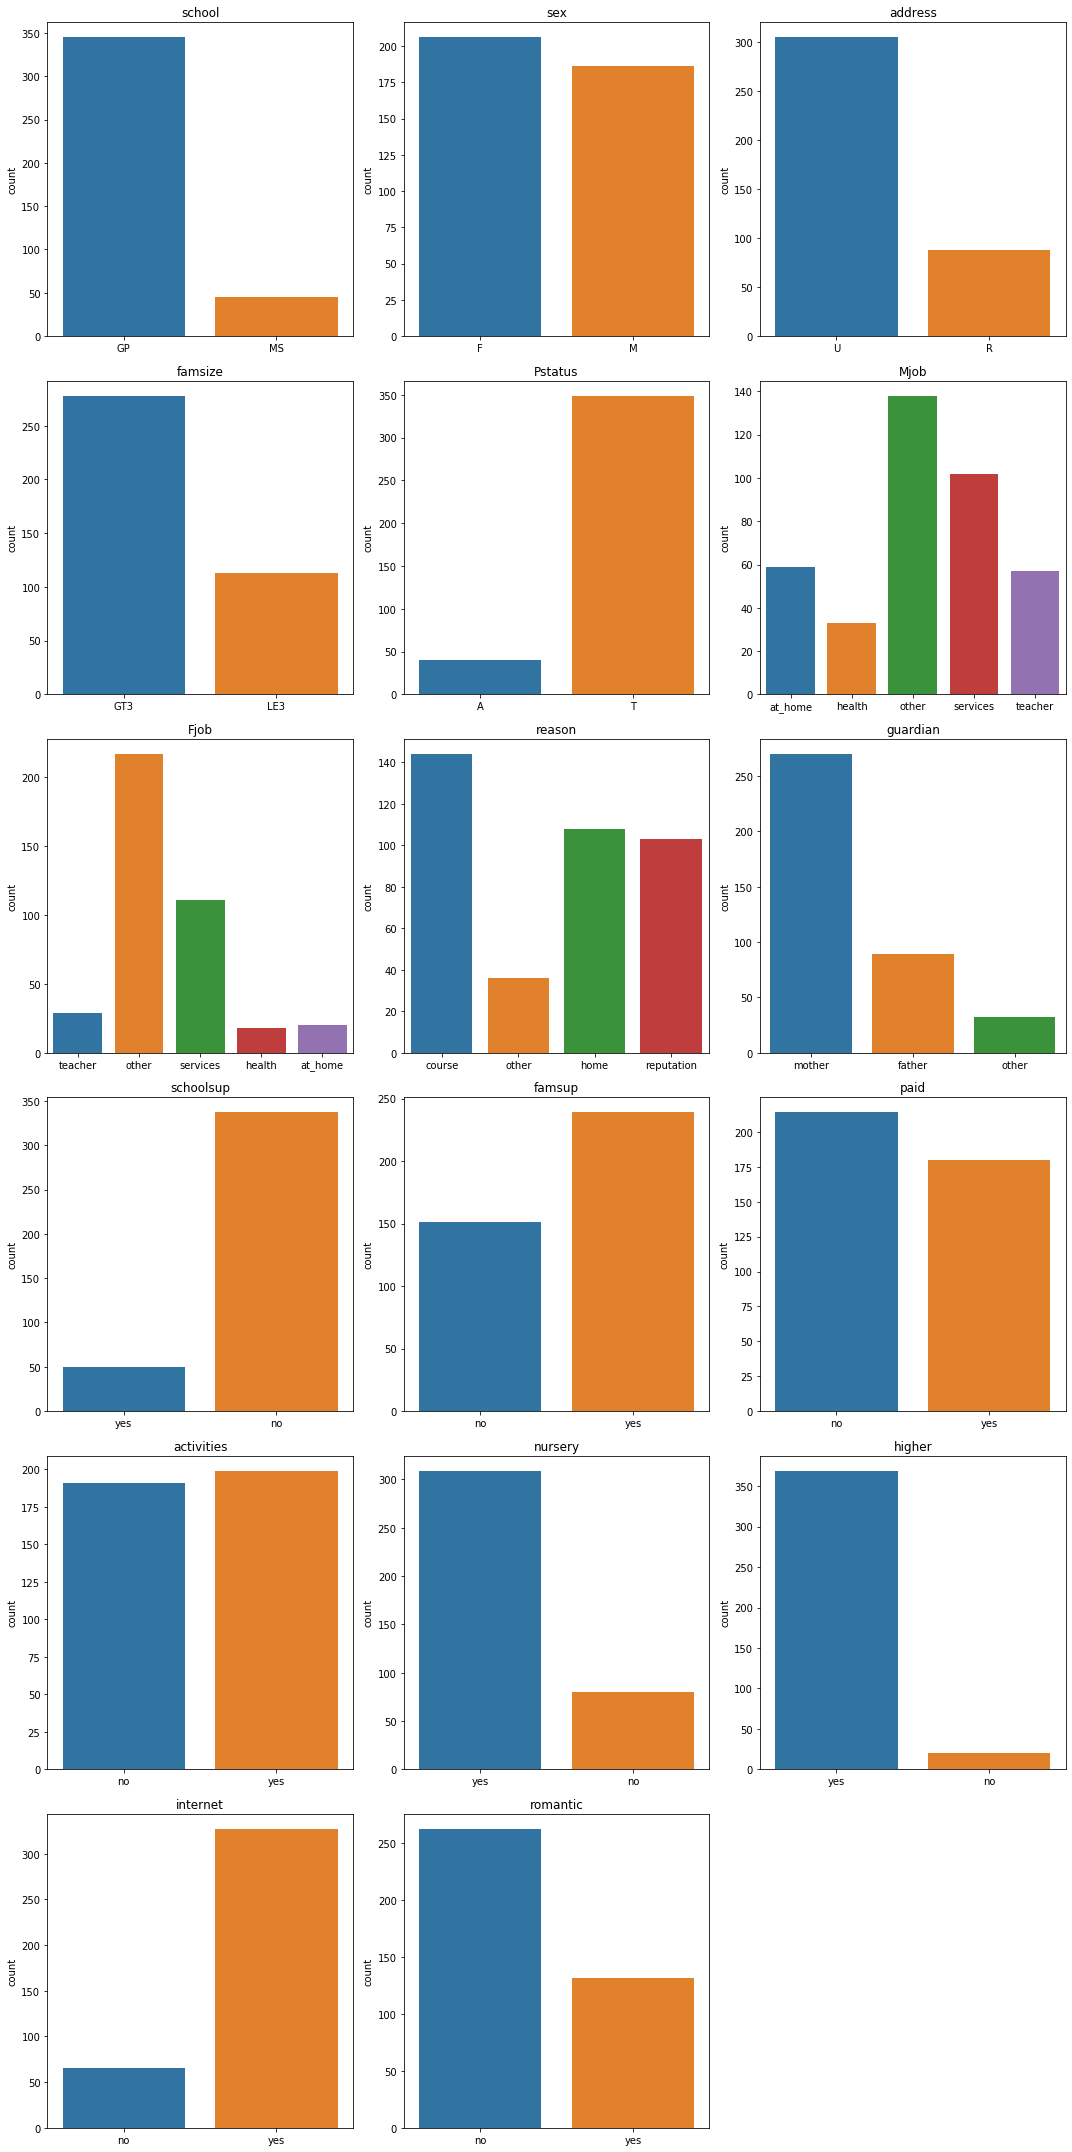

In [10]:
fig,_ = plt.subplots(figsize = (15,30))

for i, (colname,col) in enumerate (df.select_dtypes('O').iteritems()):
    plt.subplot(6,3,i+1)
    sns.countplot(df[colname])
    plt.title(colname)
    plt.xlabel("")
    plt.tight_layout()

Teniendo en consideración las clases con mayor desbalance, se puede apreciar el colegio. Los datos de la muestra se tomaron más en un establecimiento que en el otro, por lo tanto los resultados podrian representar mejor al desempeño de los estudiantes del colegio Gabriel Pereira (GP).

Llama la atención el gráfico de schoolsup, que hace referencia al apoyo que otorga el colegio, en este caso los datos son un reflejo de que los establecimientos, en mayor medida, no tendrían un apoyo adecuado hacia el alumno.

Otro aspecto a considerar, que nos informan los gráficos es que alrededor de un 30 % de los estudiantes no cuenta con acceso a internet, lo cual puede ser una variable a considerar al momento de predecir un desempeño académico.

#### Histogramas de variables numéricas

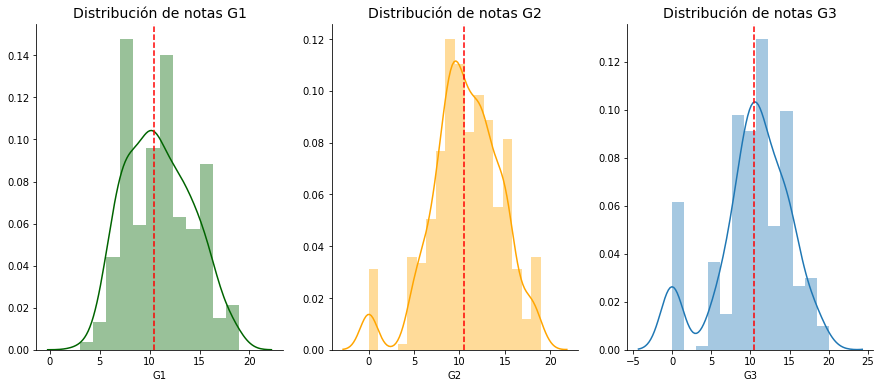

In [11]:
fig,ax = plt.subplots(1,3,figsize = (15,6))
ax[0].set_title('Distribución de notas G1',size=14)
ax[1].set_title('Distribución de notas G2',size=14)
ax[2].set_title('Distribución de notas G3',size=14)

sns.distplot(df.G1,ax=ax[0],color='darkgreen')
sns.distplot(df.G2,ax=ax[1],color='orange')
sns.distplot(df.G3,ax=ax[2])

mean=df['G1'].mean()
mean=df['G2'].mean()
mean=df['G3'].mean()

ax[0].axvline(mean, color='r', linestyle='--')
ax[1].axvline(mean, color='r', linestyle='--')
ax[2].axvline(mean, color='r', linestyle='--')

sns.despine();

Se puede ver que las distribuciones son bastante simétricas en torno a la media, la cual se sitúa en torno a 10, de manera estable para los tres casos. Solo en G1, se puede visualizar que hay dos peak de frecuencias a diferencia de G2 y G3, pero no tiene rangos extremos. 

In [12]:
df_binarized=pd.get_dummies(df.dropna(), columns=['school', 'sex','address',
                                             'famsize','Pstatus','schoolsup','famsup','Mjob','Fjob','reason', 'guardian',
                                              'paid','activities','nursery','higher','internet','romantic'],drop_first=True,prefix_sep='_')

#### Heatmap de correlaciones

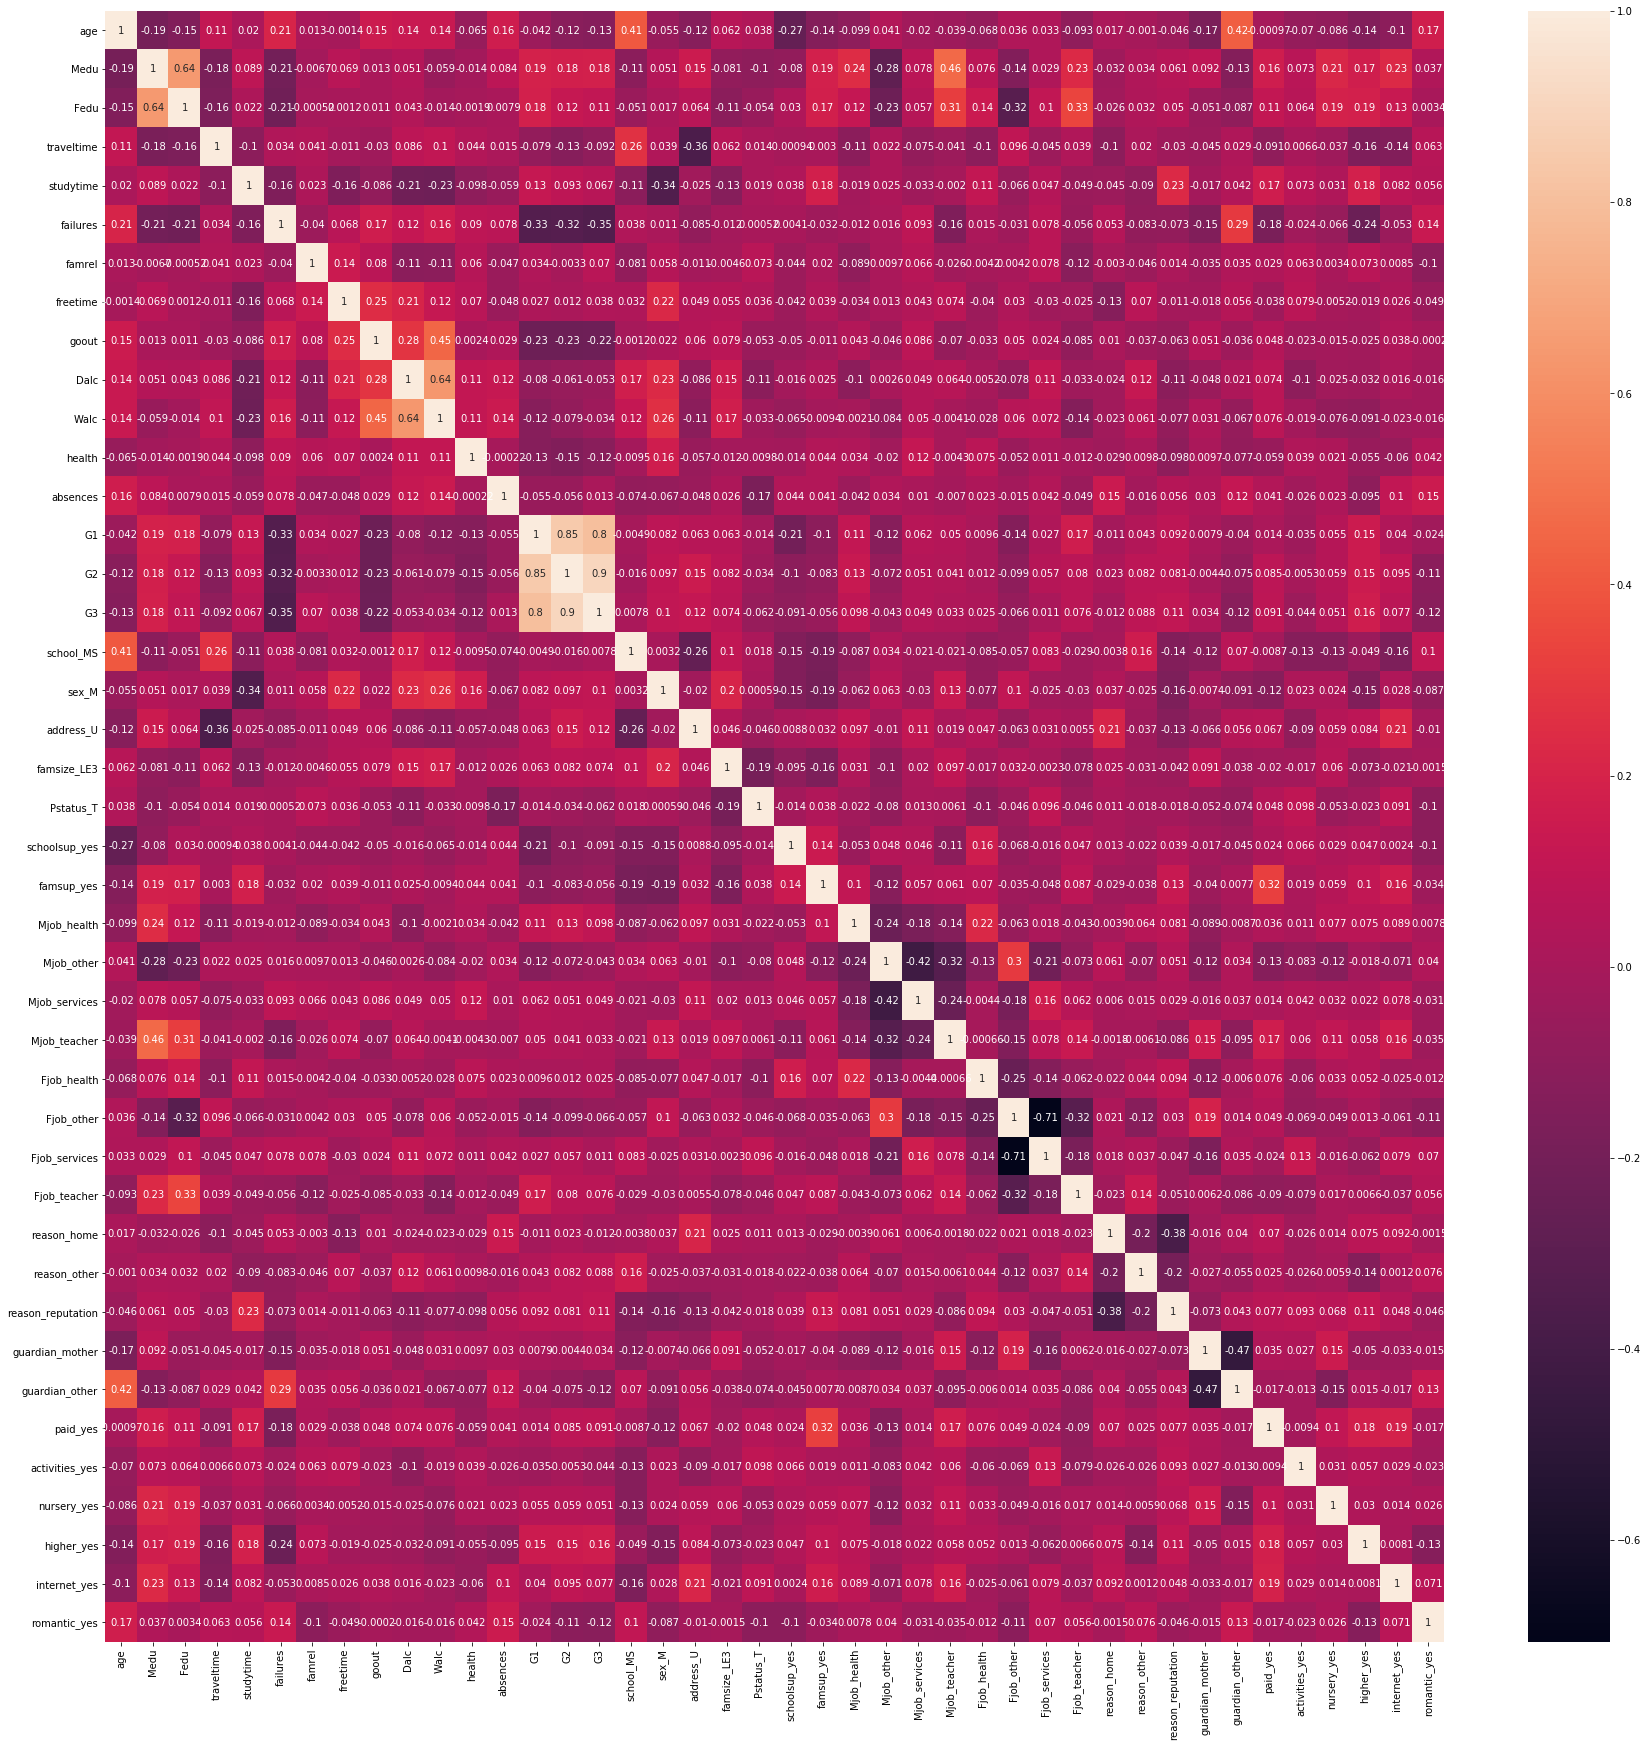

In [13]:
fig = plt.subplots(figsize = (30,30))
sns.heatmap(df_binarized.corr(),annot=True);

Mencionar que la correlación entre las notas es fuerte, ya que se acerca al valor de uno. Al ser correlaciones positivas, esto indica se comportan de manera directamente proporcional.

Otros aspectos que presentan una correlación positiva y media, son la relación entre educación el nivel de educación del padre y de la madre.

El consumo de alcohol durante la semana y fin de semana, también presentan una leve correlación. En este mismo aspecto, las salidas con los amigos se correlaciona con el consumo de alcohol los fines de semana.

## Modelación descriptiva

#### Z-score

In [14]:
df_binarized_z = df_binarized.copy()

In [15]:
for i in df_binarized_z.loc[:,'age':'G3']:
        gfx.z_score(df_binarized_z,i)

In [16]:
df_binarized_z

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,famrel_zscore,freetime_zscore,goout_zscore,Dalc_zscore,Walc_zscore,health_zscore,absences_zscore,G1_zscore,G2_zscore,G3_zscore
1,17.0,1.0,1.0,1.0,2.0,0.0,5.0,3.0,3.0,1.0,...,1.204241,-0.183073,-0.078638,-0.549448,-0.965809,-0.475977,-0.195042,-1.806997,-1.491284,-0.964130
3,15.0,4.0,2.0,1.0,3.0,0.0,3.0,2.0,2.0,1.0,...,-1.068214,-1.164071,-1.009191,-0.549448,-0.965809,1.042870,-0.440683,1.238624,0.888068,1.010482
5,16.0,4.0,3.0,1.0,2.0,0.0,5.0,4.0,2.0,1.0,...,1.204241,0.797924,-1.009191,-0.549448,-0.186577,1.042870,0.541881,1.238624,1.152440,1.010482
6,16.0,2.0,2.0,1.0,2.0,0.0,4.0,4.0,4.0,1.0,...,0.068013,0.797924,0.851914,-0.549448,-0.965809,-0.475977,-0.686324,0.324938,0.359323,0.132877
7,17.0,4.0,4.0,2.0,2.0,0.0,4.0,1.0,4.0,1.0,...,0.068013,-2.145068,0.851914,-0.549448,-0.965809,-1.994823,0.050599,-1.502435,-1.491284,-0.964130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20.0,2.0,2.0,1.0,2.0,2.0,5.0,5.0,4.0,4.0,...,1.204241,1.778921,0.851914,2.867558,2.151120,0.283447,0.664701,-0.588749,-0.433794,-0.305926
391,17.0,3.0,1.0,2.0,1.0,0.0,2.0,4.0,5.0,3.0,...,-2.204441,0.797924,1.782467,1.728556,1.371888,-1.235400,-0.317863,0.934062,1.416813,1.229884
392,21.0,1.0,1.0,1.0,1.0,3.0,5.0,5.0,3.0,3.0,...,1.204241,1.778921,-0.078638,1.728556,0.592656,-0.475977,-0.317863,-0.284187,-0.698167,-0.744729
393,18.0,3.0,2.0,3.0,1.0,0.0,4.0,4.0,1.0,3.0,...,0.068013,0.797924,-1.939743,1.728556,1.371888,1.042870,-0.686324,0.020376,0.359323,-0.086525


#### Modelamiento de regresión lineal

In [17]:
m_G1 = smf.ols('G1_zscore ~ school_MS+sex_M+address_U+famsize_LE3+ Pstatus_T\
+schoolsup_yes+famsup_yes+Mjob_health+Mjob_other\
+Mjob_services+Mjob_teacher+Fjob_health+Fjob_other\
+Fjob_services+Fjob_teacher+reason_home+reason_other\
+reason_reputation+guardian_mother+guardian_other+paid_yes\
+activities_yes+nursery_yes+higher_yes+internet_yes\
+romantic_yes+age_zscore+Medu_zscore+Fedu_zscore\
+traveltime_zscore+studytime_zscore+failures_zscore\
+famrel_zscore+freetime_zscore+goout_zscore+Dalc_zscore\
+Walc_zscore+health_zscore+absences_zscore', data=df_binarized_z).fit()

In [18]:
m_G1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              G1_zscore   R-squared:                       0.331
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     3.090
Date:                Wed, 01 Jul 2020   Prob (F-statistic):           5.75e-08
Time:                        05:19:06   Log-Likelihood:                -345.98
No. Observations:                 284   AIC:                             772.0
Df Residuals:                     244   BIC:                             917.9
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.1793      0.550      0.326      0.745      -0.904       1.262
school_MS            -0.1184      0.203     -0.583      0.560      -0.518       0.281
sex_M                 0.2324      0.131      1.768      0.078      -0.027       0.491
address_U             0.0063      0.148      0.042      0.966      -0.286       0.298
famsize_LE3           0.0952      0.134      0.710      0.478      -0.169       0.359
Pstatus_T            -0.0570      0.198     -0.288      0.774      -0.447       0.333
schoolsup_yes        -0.5402      0.172     -3.145      0.002      -0.879      -0.202
famsup_yes           -0.3064      0.125     -2.447      0.015      -0.553      -0.060
Mjob_health           0.3122      0.280      1.116      0.265      -0.239       0.863
Mjob_other           -0.1652      0.182     -0.907      0.365      -0.524       0.194
Mjob_services         0.1192      0.206      0.579      0.563      -0.286       0.524
Mjob_teacher         -0.3305      0.255     -1.298      0.195      -0.832       0.171
Fjob_health          -0.3220      0.397     -0.810      0.418      -1.104       0.461
Fjob_other           -0.4497      0.300     -1.500      0.135      -1.040       0.141
Fjob_services        -0.2596      0.301     -0.861      0.390      -0.853       0.334
Fjob_teacher          0.2487      0.364      0.683      0.495      -0.469       0.966
reason_home           0.1127      0.144      0.783      0.434      -0.171       0.396
reason_other          0.0306      0.206      0.149      0.882      -0.375       0.436
reason_reputation     0.1618      0.148      1.090      0.277      -0.131       0.454
guardian_mother       0.0636      0.146      0.436      0.663      -0.224       0.351
guardian_other        0.0904      0.259      0.349      0.727      -0.420       0.600
paid_yes              0.0098      0.123      0.080      0.937      -0.232       0.252
activities_yes       -0.1437      0.113     -1.276      0.203      -0.366       0.078
nursery_yes          -0.0078      0.139     -0.056      0.955      -0.281       0.265
higher_yes            0.3374      0.267      1.265      0.207      -0.188       0.863
internet_yes          0.0204      0.153      0.134      0.894      -0.280       0.321
romantic_yes         -0.0257      0.122     -0.211      0.833      -0.265       0.214
age_zscore            0.0301      0.072      0.418      0.677      -0.112       0.172
Medu_zscore           0.0602      0.094      0.642      0.521      -0.125       0.245
Fedu_zscore           0.0506      0.078      0.646      0.519      -0.104       0.205
traveltime_zscore    -0.0045      0.061     -0.074      0.941      -0.126       0.117
studytime_zscore      0.1301      0.063      2.068      0.040       0.006       0.254
failures_zscore      -0.2497      0.063     -3.977      0.000      -0.373

En el modelo 1, se puede observar que el valor de la bondad del ajuste es bajo, lo cual indica que alrededor de un 33%, sin embargo al ser un modelo con múltiples variables, el r2-ajustado disminuye a un valor de 0.22, lo cual implica que en realidad m1 explica menos el comportamiento de la variable dependiente.

En cuanto a los variables, que tienen una mayor significancia, estas son: schoolsup, famsup, failures y goout, ya que todas tienes p-values, inferiores al 0.025, lo cual permite rechazar la hipotesis nula con un 95% de confianza.

In [19]:
m_G2 = smf.ols('G2_zscore ~ school_MS+sex_M+address_U+famsize_LE3+ Pstatus_T\
+schoolsup_yes+famsup_yes+Mjob_health+Mjob_other\
+Mjob_services+Mjob_teacher+Fjob_health+Fjob_other\
+Fjob_services+Fjob_teacher+reason_home+reason_other\
+reason_reputation+guardian_mother+guardian_other+paid_yes\
+activities_yes+nursery_yes+higher_yes+internet_yes\
+romantic_yes+age_zscore+Medu_zscore+Fedu_zscore\
+traveltime_zscore+studytime_zscore+failures_zscore\
+famrel_zscore+freetime_zscore+goout_zscore+Dalc_zscore\
+Walc_zscore+health_zscore+absences_zscore+G1_zscore', data=df_binarized_z).fit()

In [20]:
m_G2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              G2_zscore   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     21.23
Date:                Wed, 01 Jul 2020   Prob (F-statistic):           6.35e-59
Time:                        05:19:06   Log-Likelihood:                -189.55
No. Observations:                 284   AIC:                             461.1
Df Residuals:                     243   BIC:                             610.7
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.5461      0.318     -1.719      0.087      -1.172       0.080
school_MS             0.1632      0.117      1.391      0.165      -0.068       0.394
sex_M                 0.0388      0.076      0.507      0.612      -0.112       0.189
address_U             0.1940      0.086      2.265      0.024       0.025       0.363
famsize_LE3           0.0423      0.078      0.546      0.586      -0.110       0.195
Pstatus_T            -0.1092      0.114     -0.954      0.341      -0.335       0.116
schoolsup_yes         0.1810      0.101      1.788      0.075      -0.018       0.380
famsup_yes           -0.0064      0.073     -0.088      0.930      -0.151       0.138
Mjob_health           0.0811      0.162      0.501      0.617      -0.238       0.400
Mjob_other            0.1275      0.105      1.210      0.227      -0.080       0.335
Mjob_services         0.0389      0.119      0.327      0.744      -0.195       0.273
Mjob_teacher          0.0252      0.148      0.171      0.865      -0.265       0.316
Fjob_health           0.1713      0.230      0.745      0.457      -0.281       0.624
Fjob_other            0.2057      0.174      1.182      0.238      -0.137       0.548
Fjob_services         0.2841      0.174      1.629      0.105      -0.059       0.628
Fjob_teacher          0.0648      0.211      0.308      0.759      -0.350       0.480
reason_home           0.0284      0.083      0.341      0.733      -0.136       0.192
reason_other          0.1856      0.119      1.562      0.120      -0.048       0.420
reason_reputation     0.0347      0.086      0.404      0.686      -0.135       0.204
guardian_mother      -0.0424      0.084     -0.503      0.615      -0.208       0.124
guardian_other       -0.0656      0.150     -0.439      0.661      -0.360       0.229
paid_yes              0.1181      0.071      1.666      0.097      -0.022       0.258
activities_yes        0.0655      0.065      1.003      0.317      -0.063       0.194
nursery_yes           0.0446      0.080      0.557      0.578      -0.113       0.202
higher_yes            0.0086      0.155      0.056      0.956      -0.296       0.313
internet_yes          0.0995      0.088      1.127      0.261      -0.074       0.273
romantic_yes         -0.1720      0.070     -2.450      0.015      -0.310      -0.034
age_zscore           -0.0490      0.042     -1.176      0.241      -0.131       0.033
Medu_zscore           0.0423      0.054      0.780      0.436      -0.065       0.149
Fedu_zscore          -0.0782      0.045     -1.726      0.086      -0.167       0.011
traveltime_zscore    -0.0367      0.036     -1.035      0.302      -0.107       0.033
studytime_zscore     -0.0169      0.037     -0.462      0.644      -0.089       0.055
failures_zscore      -0.0072      0.037     -0.192      0.848      -0.081

En cuanto al modelo 2, se puede observar este modelo explica mejor la varianza, ya que el r-ajustado es de un .74, lo cual es un valor bastante cercano a 1, y mucho mejor que el desepeño de m1, considerando que ambos están saturados.

Las variables más relevantes para este modelo, cambian respecto a m1. Para el caso de m2, los valores inferiores a 0.25 son de:
address_U, romantic_yes y G1_zscore. Si bien este modelo explica mejor el desempeño, sería bueno poder reevaluar la muestra o el procedimiento, ya que 2 de estas variables, a primera vista (cercania y estar en una relación romantica), no son muy evidentes. Lo que si es más lógico, es que si hubo un primer buen desempeño de G1, eso pueda explicar un comportamiento de la variable dependiente G2.

In [21]:
m_G3 = smf.ols('G3_zscore ~ school_MS+sex_M+address_U+famsize_LE3+ Pstatus_T\
+schoolsup_yes+famsup_yes+Mjob_health+Mjob_other\
+Mjob_services+Mjob_teacher+Fjob_health+Fjob_other\
+Fjob_services+Fjob_teacher+reason_home+reason_other\
+reason_reputation+guardian_mother+guardian_other+paid_yes\
+activities_yes+nursery_yes+higher_yes+internet_yes\
+romantic_yes+age_zscore+Medu_zscore+Fedu_zscore\
+traveltime_zscore+studytime_zscore+failures_zscore\
+famrel_zscore+freetime_zscore+goout_zscore+Dalc_zscore\
+Walc_zscore+health_zscore+absences_zscore+G2_zscore+G1_zscore', data=df_binarized_z).fit()

In [22]:
m_G3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              G3_zscore   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     34.13
Date:                Wed, 01 Jul 2020   Prob (F-statistic):           4.20e-79
Time:                        05:19:06   Log-Likelihood:                -131.14
No. Observations:                 284   AIC:                             346.3
Df Residuals:                     242   BIC:                             499.5
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0200      0.261     -0.077      0.939      -0.534       0.493
school_MS             0.1733      0.096      1.804      0.072      -0.016       0.363
sex_M                 0.0094      0.062      0.151      0.880      -0.113       0.132
address_U             0.0447      0.071      0.633      0.528      -0.094       0.184
famsize_LE3          -0.0278      0.063     -0.440      0.661      -0.152       0.097
Pstatus_T            -0.0950      0.094     -1.016      0.311      -0.279       0.089
schoolsup_yes         0.0580      0.083      0.698      0.486      -0.106       0.222
famsup_yes            0.0408      0.060      0.682      0.496      -0.077       0.158
Mjob_health          -0.0085      0.132     -0.065      0.949      -0.269       0.252
Mjob_other            0.0932      0.086      1.080      0.281      -0.077       0.263
Mjob_services         0.0397      0.097      0.409      0.683      -0.151       0.231
Mjob_teacher          0.0127      0.120      0.106      0.916      -0.224       0.250
Fjob_health          -0.0144      0.188     -0.077      0.939      -0.384       0.355
Fjob_other           -0.1066      0.142     -0.749      0.455      -0.387       0.174
Fjob_services        -0.1291      0.143     -0.903      0.367      -0.411       0.153
Fjob_teacher         -0.0701      0.172     -0.408      0.684      -0.409       0.269
reason_home          -0.0569      0.068     -0.838      0.403      -0.191       0.077
reason_other          0.0481      0.097      0.494      0.622      -0.144       0.240
reason_reputation     0.0533      0.070      0.760      0.448      -0.085       0.191
guardian_mother       0.0450      0.069      0.654      0.513      -0.090       0.180
guardian_other       -0.1005      0.122     -0.824      0.411      -0.341       0.140
paid_yes              0.0195      0.058      0.335      0.738      -0.095       0.134
activities_yes       -0.0726      0.053     -1.359      0.175      -0.178       0.033
nursery_yes          -0.0086      0.065     -0.132      0.895      -0.137       0.120
higher_yes            0.1068      0.126      0.847      0.398      -0.142       0.355
internet_yes          0.0010      0.072      0.014      0.989      -0.141       0.143
romantic_yes         -0.0460      0.058     -0.793      0.428      -0.160       0.068
age_zscore           -0.0324      0.034     -0.949      0.344      -0.100       0.035
Medu_zscore           0.0412      0.044      0.931      0.353      -0.046       0.128
Fedu_zscore          -0.0546      0.037     -1.469      0.143      -0.128       0.019
traveltime_zscore     0.0107      0.029      0.370      0.712      -0.046       0.068
studytime_zscore     -0.0202      0.030     -0.674      0.501      -0.079       0.039
failures_zscore      -0.0340      0.031     -1.115      0.266      -0.094

El modelo m3, aparentemente tendría una mayor calidad que G2 y G1. Su r-ajustado es de 0.82.

En este caso las variables que tiene mayor significancia serían: G1, G2, absences, famrel y Walc_zscore, las cuales en total son 5. El modelo 3, sería el que más variables tiene respecto a los 2 anteriores.

Al igual que en m2, las variables G1 y G2, tienen pvalues muy bajos, por lo tanto se encuentran muy relacionadas al rendimiento final del alumno.

Una variable que nos puede ayudar a seleccionar un modelo es AIC, el cual al comparar los modelos, debe ser mas bajo. En el caso de comparar los valores de AIC de los 3 modelos, también se seleccionaría este ultumo modelo ya AICm3 < AICm2 < AICm1. 

### Modelación predictiva

In [41]:
X_mat=df_binarized.drop(['G3'],axis=1)
y_vec=df_binarized['G3']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_mat, y_vec, test_size=.33, random_state=1024)

In [45]:
m_G3_ml=linear_model.LinearRegression(fit_intercept=True,normalize=True).fit(X_train, y_train) 

In [47]:
y_hat=m_G3_ml.predict(X_test)

In [48]:
def report_scores(y_hat,y_test):
    mse = mean_squared_error(y_test,y_hat)
    r2 = r2_score(y_test,y_hat)
    
    print(f'Mean Square Error:\t{mse}\nR-cuadrado:\t\t{r2}\n')

In [49]:
report_scores(y_hat, y_test)

Mean Square Error:	4.51962423324585
R-cuadrado:		0.7511766383976877



En cuanto al modelo que bsuca predecir G3 mediante Machine Learning, se puede observar que su r2 explica el 72 % de la varianza.

El MSE, es una forma de penalizar los errores, multiplicando al cuadrado los valores, a mayor diferencia entre el valor y el punto en la linea de regresión, máyor será el valor al cuadrado. Al comparara con otros modelos, se debe privilegiar el que tenga menor MSE o RMSE y mayor R-cuadrado.